In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

When importing dataset, by sorting with MatchID, dataset is now timeseries dataset. Every feature is (home-away) and result is decided with score diff. We have total 50 feature differences.

In [2]:
data=pd.read_csv('Data/Dataset.csv').drop(['Unnamed: 0'],axis=1).sort_values(by=['MatchID'])
df_home=data.filter(regex='home').rename(columns=lambda x:x.replace('_home',''))
df_away=data.filter(regex='away').rename(columns=lambda x:x.replace('_away',''))
df_diff=df_home-df_away
cond=[(df_diff['Score']<0),(df_diff['Score']==0),(df_diff['Score']>0)]
val=['Away','Draw','Home']
df_diff['Result']=np.select(cond,val)
df_diff=df_diff.drop(columns=['Score'])
X=df_diff.iloc[:,:-1]
y=df_diff.iloc[:,-1:].values.ravel()

In [3]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

## Train,Test,Validation set split
Split train,test,validation set into 0.8,0.1,0.1

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_test,X_val,y_test,y_val=train_test_split(X_test,y_test,test_size=0.5)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape

((2836, 50), (2836,), (354, 50), (354,), (355, 50), (355,))

## Feature selection

Feature ranking:
1. feature Assists (0.036)
2. feature Clean sheets (0.035)
3. feature Passes (0.035)
4. feature Big Chances Created (0.032)
5. feature Goals (0.030)
6. feature Blocked shots (0.028)
7. feature Shots on target (0.023)
8. feature Big chances missed (0.023)
9. feature Goals with right foot (0.022)
10. feature Goals with left foot (0.021)
11. feature Goals Conceded (0.021)
12. feature Penalties scored (0.020)
13. feature Hit woodwork (0.020)
14. feature Sweeper clearances (0.020)
15. feature Shots (0.020)
16. feature Crosses (0.020)
17. feature Own goals (0.020)
18. feature Tackle success % (0.020)
19. feature Throw outs (0.019)
20. feature Clearances off line (0.019)
21. feature Freekicks scored (0.019)
22. feature Last man tackles (0.019)
23. feature Red cards (0.019)
24. feature Catches (0.018)
25. feature Punches (0.018)
26. feature Cross accuracy % (0.018)
27. feature High Claims (0.018)
28. feature Interceptions (0.018)
29. feature Yellow cards (0.018)
30. feature Ac

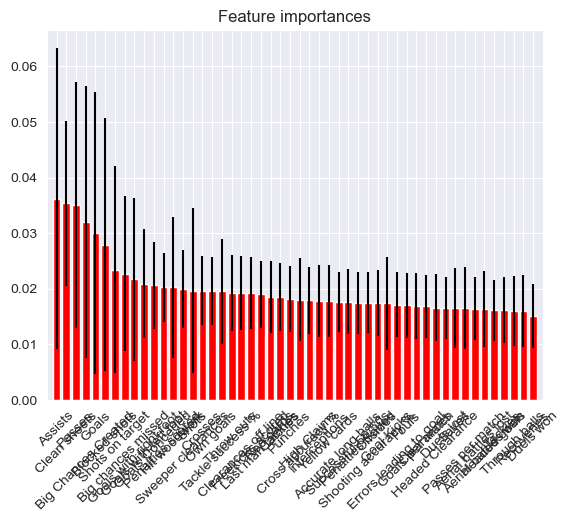

In [6]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

## Logistic Regression

In [7]:
clf = LogisticRegression()
clf.max_iter=500
clf.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [8]:
clf.score(X_test,y_test)

0.5790960451977402

In [9]:
clf.score(X_val,y_val)

0.532394366197183

## SVM

In [10]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [11]:
clf.score(X_test,y_test)

0.5338983050847458

In [12]:
clf.score(X_val,y_val)

0.5014084507042254

## SVM pairwise

In [13]:
clf=svm.LinearSVC()
clf.fit(X_train,y_train)

/Users/hokuma/miniconda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [14]:
clf.score(X_test,y_test)

0.5734463276836158

In [15]:
clf.score(X_val,y_val)

0.5380281690140845

## GridSearch to optimize hyperparameter

In [7]:
parameters = {'kernel':('linear', 'rbf'), 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C':[1, 10]}
svc=svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)

/Users/hokuma/miniconda/lib/python3.9/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ('linear', 'rbf')})

In [8]:
print(clf.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'linear'}


In [9]:
clf=svm.SVC(C=10,gamma=1,kernel='linear')
clf.fit(X_train,y_train)

SVC(C=10, gamma=1, kernel='linear')

In [10]:
clf.score(X_test,y_test)

0.596045197740113

In [11]:
clf.score(X_val,y_val)

0.5492957746478874

In [13]:
clf = svm.SVC(C=5, gamma=1, kernel='linear')
clf.fit(X_train, y_train)

SVC(C=5, gamma=1, kernel='linear')

In [14]:
clf.score(X_test,y_test)

0.5988700564971752

In [15]:
clf.score(X_val,y_val)

0.5549295774647888

In [16]:
clf=svm.SVC(C=10,gamma=1,kernel='rbf')
clf.fit(X_train,y_train)

SVC(C=10, gamma=1)

In [17]:
clf.score(X_test,y_test)

0.4689265536723164

In [18]:
clf=svm.SVC(C=5,gamma=1,kernel='rbf')
clf.fit(X_train,y_train)

SVC(C=5, gamma=1)

In [19]:
clf.score(X_test,y_test)

0.4689265536723164